In [2]:
import json
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
import numpy as np
import pandas as pd

# Multiple Choice

In [3]:
openai_en_classes = ["tench", "goldfish", "great white shark", "tiger shark", "hammerhead shark", "electric ray",
                     "stingray", "rooster", "hen", "ostrich", "brambling", "goldfinch", "house finch", "junco",
                     "indigo bunting", "American robin", "bulbul", "jay", "magpie", "chickadee", "American dipper",
                     "kite (bird of prey)", "bald eagle", "vulture", "great grey owl", "fire salamander",
                     "smooth newt", "newt", "spotted salamander", "axolotl", "American bullfrog", "tree frog",
                     "tailed frog", "loggerhead sea turtle", "leatherback sea turtle", "mud turtle", "terrapin",
                     "box turtle", "banded gecko", "green iguana", "Carolina anole",
                     "desert grassland whiptail lizard", "agama", "frilled-necked lizard", "alligator lizard",
                     "Gila monster", "European green lizard", "chameleon", "Komodo dragon", "Nile crocodile",
                     "American alligator", "triceratops", "worm snake", "ring-necked snake",
                     "eastern hog-nosed snake", "smooth green snake", "kingsnake", "garter snake", "water snake",
                     "vine snake", "night snake", "boa constrictor", "African rock python", "Indian cobra",
                     "green mamba", "sea snake", "Saharan horned viper", "eastern diamondback rattlesnake",
                     "sidewinder rattlesnake", "trilobite", "harvestman", "scorpion", "yellow garden spider",
                     "barn spider", "European garden spider", "southern black widow", "tarantula", "wolf spider",
                     "tick", "centipede", "black grouse", "ptarmigan", "ruffed grouse", "prairie grouse", "peafowl",
                     "quail", "partridge", "african grey parrot", "macaw", "sulphur-crested cockatoo", "lorikeet",
                     "coucal", "bee eater", "hornbill", "hummingbird", "jacamar", "toucan", "duck",
                     "red-breasted merganser", "goose", "black swan", "tusker", "echidna", "platypus", "wallaby",
                     "koala", "wombat", "jellyfish", "sea anemone", "brain coral", "flatworm", "nematode", "conch",
                     "snail", "slug", "sea slug", "chiton", "chambered nautilus", "Dungeness crab", "rock crab",
                     "fiddler crab", "red king crab", "American lobster", "spiny lobster", "crayfish",
                     "hermit crab", "isopod", "white stork", "black stork", "spoonbill", "flamingo",
                     "little blue heron", "great egret", "bittern bird", "crane bird", "limpkin",
                     "common gallinule", "American coot", "bustard", "ruddy turnstone", "dunlin", "common redshank",
                     "dowitcher", "oystercatcher", "pelican", "king penguin", "albatross", "grey whale",
                     "killer whale", "dugong", "sea lion", "Chihuahua", "Japanese Chin", "Maltese", "Pekingese",
                     "Shih Tzu", "King Charles Spaniel", "Papillon", "toy terrier", "Rhodesian Ridgeback",
                     "Afghan Hound", "Basset Hound", "Beagle", "Bloodhound", "Bluetick Coonhound",
                     "Black and Tan Coonhound", "Treeing Walker Coonhound", "English foxhound", "Redbone Coonhound",
                     "borzoi", "Irish Wolfhound", "Italian Greyhound", "Whippet", "Ibizan Hound",
                     "Norwegian Elkhound", "Otterhound", "Saluki", "Scottish Deerhound", "Weimaraner",
                     "Staffordshire Bull Terrier", "American Staffordshire Terrier", "Bedlington Terrier",
                     "Border Terrier", "Kerry Blue Terrier", "Irish Terrier", "Norfolk Terrier", "Norwich Terrier",
                     "Yorkshire Terrier", "Wire Fox Terrier", "Lakeland Terrier", "Sealyham Terrier",
                     "Airedale Terrier", "Cairn Terrier", "Australian Terrier", "Dandie Dinmont Terrier",
                     "Boston Terrier", "Miniature Schnauzer", "Giant Schnauzer", "Standard Schnauzer",
                     "Scottish Terrier", "Tibetan Terrier", "Australian Silky Terrier",
                     "Soft-coated Wheaten Terrier", "West Highland White Terrier", "Lhasa Apso",
                     "Flat-Coated Retriever", "Curly-coated Retriever", "Golden Retriever", "Labrador Retriever",
                     "Chesapeake Bay Retriever", "German Shorthaired Pointer", "Vizsla", "English Setter",
                     "Irish Setter", "Gordon Setter", "Brittany dog", "Clumber Spaniel", "English Springer Spaniel",
                     "Welsh Springer Spaniel", "Cocker Spaniel", "Sussex Spaniel", "Irish Water Spaniel", "Kuvasz",
                     "Schipperke", "Groenendael dog", "Malinois", "Briard", "Australian Kelpie", "Komondor",
                     "Old English Sheepdog", "Shetland Sheepdog", "collie", "Border Collie",
                     "Bouvier des Flandres dog", "Rottweiler", "German Shepherd Dog", "Dobermann",
                     "Miniature Pinscher", "Greater Swiss Mountain Dog", "Bernese Mountain Dog",
                     "Appenzeller Sennenhund", "Entlebucher Sennenhund", "Boxer", "Bullmastiff", "Tibetan Mastiff",
                     "French Bulldog", "Great Dane", "St. Bernard", "husky", "Alaskan Malamute", "Siberian Husky",
                     "Dalmatian", "Affenpinscher", "Basenji", "pug", "Leonberger", "Newfoundland dog",
                     "Great Pyrenees dog", "Samoyed", "Pomeranian", "Chow Chow", "Keeshond", "brussels griffon",
                     "Pembroke Welsh Corgi", "Cardigan Welsh Corgi", "Toy Poodle", "Miniature Poodle",
                     "Standard Poodle", "Mexican hairless dog (xoloitzcuintli)", "grey wolf", "Alaskan tundra wolf",
                     "red wolf or maned wolf", "coyote", "dingo", "dhole", "African wild dog", "hyena", "red fox",
                     "kit fox", "Arctic fox", "grey fox", "tabby cat", "tiger cat", "Persian cat", "Siamese cat",
                     "Egyptian Mau", "cougar", "lynx", "leopard", "snow leopard", "jaguar", "lion", "tiger",
                     "cheetah", "brown bear", "American black bear", "polar bear", "sloth bear", "mongoose",
                     "meerkat", "tiger beetle", "ladybug", "ground beetle", "longhorn beetle", "leaf beetle",
                     "dung beetle", "rhinoceros beetle", "weevil", "fly", "bee", "ant", "grasshopper",
                     "cricket insect", "stick insect", "cockroach", "praying mantis", "cicada", "leafhopper",
                     "lacewing", "dragonfly", "damselfly", "red admiral butterfly", "ringlet butterfly",
                     "monarch butterfly", "small white butterfly", "sulphur butterfly", "gossamer-winged butterfly",
                     "starfish", "sea urchin", "sea cucumber", "cottontail rabbit", "hare", "Angora rabbit",
                     "hamster", "porcupine", "fox squirrel", "marmot", "beaver", "guinea pig",
                     "common sorrel horse", "zebra", "pig", "wild boar", "warthog", "hippopotamus", "ox",
                     "water buffalo", "bison", "ram (adult male sheep)", "bighorn sheep", "Alpine ibex",
                     "hartebeest", "impala (antelope)", "gazelle", "arabian camel", "llama", "weasel", "mink",
                     "European polecat", "black-footed ferret", "otter", "skunk", "badger", "armadillo",
                     "three-toed sloth", "orangutan", "gorilla", "chimpanzee", "gibbon", "siamang", "guenon",
                     "patas monkey", "baboon", "macaque", "langur", "black-and-white colobus", "proboscis monkey",
                     "marmoset", "white-headed capuchin", "howler monkey", "titi monkey",
                     "Geoffroy's spider monkey", "common squirrel monkey", "ring-tailed lemur", "indri",
                     "Asian elephant", "African bush elephant", "red panda", "giant panda", "snoek fish", "eel",
                     "silver salmon", "rock beauty fish", "clownfish", "sturgeon", "gar fish", "lionfish",
                     "pufferfish", "abacus", "abaya", "academic gown", "accordion", "acoustic guitar",
                     "aircraft carrier", "airliner", "airship", "altar", "ambulance", "amphibious vehicle",
                     "analog clock", "apiary", "apron", "trash can", "assault rifle", "backpack", "bakery",
                     "balance beam", "balloon", "ballpoint pen", "Band-Aid", "banjo", "baluster / handrail",
                     "barbell", "barber chair", "barbershop", "barn", "barometer", "barrel", "wheelbarrow",
                     "baseball", "basketball", "bassinet", "bassoon", "swimming cap", "bath towel", "bathtub",
                     "station wagon", "lighthouse", "beaker", "military hat (bearskin or shako)", "beer bottle",
                     "beer glass", "bell tower", "baby bib", "tandem bicycle", "bikini", "ring binder",
                     "binoculars", "birdhouse", "boathouse", "bobsleigh", "bolo tie", "poke bonnet", "bookcase",
                     "bookstore", "bottle cap", "hunting bow", "bow tie", "brass memorial plaque", "bra",
                     "breakwater", "breastplate", "broom", "bucket", "buckle", "bulletproof vest",
                     "high-speed train", "butcher shop", "taxicab", "cauldron", "candle", "cannon", "canoe",
                     "can opener", "cardigan", "car mirror", "carousel", "tool kit", "cardboard box / carton",
                     "car wheel", "automated teller machine", "cassette", "cassette player", "castle", "catamaran",
                     "CD player", "cello", "mobile phone", "chain", "chain-link fence", "chain mail", "chainsaw",
                     "storage chest", "chiffonier", "bell or wind chime", "china cabinet", "Christmas stocking",
                     "church", "movie theater", "cleaver", "cliff dwelling", "cloak", "clogs", "cocktail shaker",
                     "coffee mug", "coffeemaker", "spiral or coil", "combination lock", "computer keyboard",
                     "candy store", "container ship", "convertible", "corkscrew", "cornet", "cowboy boot",
                     "cowboy hat", "cradle", "construction crane", "crash helmet", "crate", "infant bed",
                     "Crock Pot", "croquet ball", "crutch", "cuirass", "dam", "desk", "desktop computer",
                     "rotary dial telephone", "diaper", "digital clock", "digital watch", "dining table",
                     "dishcloth", "dishwasher", "disc brake", "dock", "dog sled", "dome", "doormat", "drilling rig",
                     "drum", "drumstick", "dumbbell", "Dutch oven", "electric fan", "electric guitar",
                     "electric locomotive", "entertainment center", "envelope", "espresso machine", "face powder",
                     "feather boa", "filing cabinet", "fireboat", "fire truck", "fire screen", "flagpole", "flute",
                     "folding chair", "football helmet", "forklift", "fountain", "fountain pen", "four-poster bed",
                     "freight car", "French horn", "frying pan", "fur coat", "garbage truck",
                     "gas mask or respirator", "gas pump", "goblet", "go-kart", "golf ball", "golf cart", "gondola",
                     "gong", "gown", "grand piano", "greenhouse", "radiator grille", "grocery store", "guillotine",
                     "hair clip", "hair spray", "half-track", "hammer", "hamper", "hair dryer",
                     "hand-held computer", "handkerchief", "hard disk drive", "harmonica", "harp",
                     "combine harvester", "hatchet", "holster", "home theater", "honeycomb", "hook", "hoop skirt",
                     "gymnastic horizontal bar", "horse-drawn vehicle", "hourglass", "iPod", "clothes iron",
                     "carved pumpkin", "jeans", "jeep", "T-shirt", "jigsaw puzzle", "rickshaw", "joystick",
                     "kimono", "knee pad", "knot", "lab coat", "ladle", "lampshade", "laptop computer",
                     "lawn mower", "lens cap", "letter opener", "library", "lifeboat", "lighter", "limousine",
                     "ocean liner", "lipstick", "slip-on shoe", "lotion", "music speaker", "loupe magnifying glass",
                     "sawmill", "magnetic compass", "messenger bag", "mailbox", "tights", "one-piece bathing suit",
                     "manhole cover", "maraca", "marimba", "mask", "matchstick", "maypole", "maze", "measuring cup",
                     "medicine cabinet", "megalith", "microphone", "microwave oven", "military uniform", "milk can",
                     "minibus", "miniskirt", "minivan", "missile", "mitten", "mixing bowl", "mobile home",
                     "ford model t", "modem", "monastery", "monitor", "moped", "mortar and pestle",
                     "graduation cap", "mosque", "mosquito net", "vespa", "mountain bike", "tent", "computer mouse",
                     "mousetrap", "moving van", "muzzle", "metal nail", "neck brace", "necklace", "baby pacifier",
                     "notebook computer", "obelisk", "oboe", "ocarina", "odometer", "oil filter", "pipe organ",
                     "oscilloscope", "overskirt", "bullock cart", "oxygen mask", "product packet / packaging",
                     "paddle", "paddle wheel", "padlock", "paintbrush", "pajamas", "palace", "pan flute",
                     "paper towel", "parachute", "parallel bars", "park bench", "parking meter", "railroad car",
                     "patio", "payphone", "pedestal", "pencil case", "pencil sharpener", "perfume", "Petri dish",
                     "photocopier", "plectrum", "Pickelhaube", "picket fence", "pickup truck", "pier", "piggy bank",
                     "pill bottle", "pillow", "ping-pong ball", "pinwheel", "pirate ship", "drink pitcher",
                     "block plane", "planetarium", "plastic bag", "plate rack", "farm plow", "plunger",
                     "Polaroid camera", "pole", "police van", "poncho", "pool table", "soda bottle", "plant pot",
                     "potter's wheel", "power drill", "prayer rug", "printer", "prison", "projectile", "projector",
                     "hockey puck", "punching bag", "purse", "quill", "quilt", "race car", "racket", "radiator",
                     "radio", "radio telescope", "rain barrel", "recreational vehicle", "fishing casting reel",
                     "reflex camera", "refrigerator", "remote control", "restaurant", "revolver", "rifle",
                     "rocking chair", "rotisserie", "eraser", "rugby ball", "ruler measuring stick", "sneaker",
                     "safe", "safety pin", "salt shaker", "sandal", "sarong", "saxophone", "scabbard",
                     "weighing scale", "school bus", "schooner", "scoreboard", "CRT monitor", "screw",
                     "screwdriver", "seat belt", "sewing machine", "shield", "shoe store",
                     "shoji screen / room divider", "shopping basket", "shopping cart", "shovel", "shower cap",
                     "shower curtain", "ski", "balaclava ski mask", "sleeping bag", "slide rule", "sliding door",
                     "slot machine", "snorkel", "snowmobile", "snowplow", "soap dispenser", "soccer ball", "sock",
                     "solar thermal collector", "sombrero", "soup bowl", "keyboard space bar", "space heater",
                     "space shuttle", "spatula", "motorboat", "spider web", "spindle", "sports car", "spotlight",
                     "stage", "steam locomotive", "through arch bridge", "steel drum", "stethoscope", "scarf",
                     "stone wall", "stopwatch", "stove", "strainer", "tram", "stretcher", "couch", "stupa",
                     "submarine", "suit", "sundial", "sunglass", "sunglasses", "sunscreen", "suspension bridge",
                     "mop", "sweatshirt", "swim trunks / shorts", "swing", "electrical switch", "syringe",
                     "table lamp", "tank", "tape player", "teapot", "teddy bear", "television", "tennis ball",
                     "thatched roof", "front curtain", "thimble", "threshing machine", "throne", "tile roof",
                     "toaster", "tobacco shop", "toilet seat", "torch", "totem pole", "tow truck", "toy store",
                     "tractor", "semi-trailer truck", "tray", "trench coat", "tricycle", "trimaran", "tripod",
                     "triumphal arch", "trolleybus", "trombone", "hot tub", "turnstile", "typewriter keyboard",
                     "umbrella", "unicycle", "upright piano", "vacuum cleaner", "vase", "vaulted or arched ceiling",
                     "velvet fabric", "vending machine", "vestment", "viaduct", "violin", "volleyball",
                     "waffle iron", "wall clock", "wallet", "wardrobe", "military aircraft", "sink",
                     "washing machine", "water bottle", "water jug", "water tower", "whiskey jug", "whistle",
                     "hair wig", "window screen", "window shade", "Windsor tie", "wine bottle", "airplane wing",
                     "wok", "wooden spoon", "wool", "split-rail fence", "shipwreck", "sailboat", "yurt", "website",
                     "comic book", "crossword", "traffic or street sign", "traffic light", "dust jacket", "menu",
                     "plate", "guacamole", "consomme", "hot pot", "trifle", "ice cream", "popsicle", "baguette",
                     "bagel", "pretzel", "cheeseburger", "hot dog", "mashed potatoes", "cabbage", "broccoli",
                     "cauliflower", "zucchini", "spaghetti squash", "acorn squash", "butternut squash", "cucumber",
                     "artichoke", "bell pepper", "cardoon", "mushroom", "Granny Smith apple", "strawberry",
                     "orange", "lemon", "fig", "pineapple", "banana", "jackfruit", "cherimoya (custard apple)",
                     "pomegranate", "hay", "carbonara", "chocolate syrup", "dough", "meatloaf", "pizza", "pot pie",
                     "burrito", "red wine", "espresso", "tea cup", "eggnog", "mountain", "bubble", "cliff",
                     "coral reef", "geyser", "lakeshore", "promontory", "sandbar", "beach", "valley", "volcano",
                     "baseball player", "bridegroom", "scuba diver", "rapeseed", "daisy", "yellow lady's slipper",
                     "corn", "acorn", "rose hip", "horse chestnut seed", "coral fungus", "agaric", "gyromitra",
                     "stinkhorn mushroom", "earth star fungus", "hen of the woods mushroom", "bolete", "corn cob",
                     "toilet paper"]

In [4]:
ds_names = {'fgvc_aircraft': "FGVC-Aircrafts", 
 'flowers102': "Flowers102", 
 'food101': "Food101", 
 # 'geode', 
 # 'imagenet', 
 'imagenet-6k-animal': "IN-Animal", 
 'imagenet-6k-artifact': "IN-Artifact",
 'imagenet-6k-food': "IN-Food", 
 'imagenet-6k-plant': "IN-Plant",
 # 'imagenet-adversarial',
 # 'imagenet-rendition',
 # 'imagenet-sketch', 
 'oxford_pet': "Oxford-Pets",
 'stanford_cars': "Stanford Cars"}

In [5]:

results_folder = Path("../results/mc")

all_results = defaultdict(list)

names = {
    'google_paligemma-3b-mix-224': "Pali-Gemma", 
    'HuggingFaceM4_idefics-9b-instruct': "Idefics-1", 
    'HuggingFaceM4_idefics2-8b': "Idefics-2", 
    'internlm_internlm-xcomposer2-vl-7b': "InternLM XComposer 2", 
    'llava-hf_llava-1.5-7b-hf': "LLaVA 1.5", 
    'llava-hf_llava-v1.6-mistral-7b-hf': "LLaVA-Next", 
    'microsoft_Phi-3-vision-128k-instruct': "Phi-3-Vision", 
    'mtgv_MobileVLM_V2-7B': "MobileVLM v2", 
    'Qwen_Qwen-VL-Chat': "Qwen-VL-Chat", 
    'Salesforce_blip2-flan-t5-xl': "BLIP-2 Flan-T5-XL", 
    'Salesforce_instructblip-flan-t5-xl': "InstructBLIP Flan-T5-XL", 
    'Salesforce_instructblip-vicuna-7b': "InstructBLIP Vicuna"
}



for filename in results_folder.iterdir():
    if "babel" in filename.name:
        continue
    if "yn--" in filename.name:
        continue
    res = json.load(open(filename))
    dataset, model = filename.name[:-len(".json")].split("--")
    
    res_dict = dict(model=model, name=names.get(model, model), accuracy=res["metrics"]["accuracy"]*100, failures=res["metrics"]["generation_failures"]*100)
    
    per_class_acc = defaultdict(lambda: 0)
    per_class_count = defaultdict(lambda : 0)
    position_preference = [0, 0, 0, 0]
    for pred in res["predictions"]:
        correct = pred["correct"]
        answer = pred["predicted"]
        try:
            position_preference[pred["options"].index(answer, )] += 1
        except ValueError:
            pass
        per_class_count[correct] += 1
        per_class_acc[correct] += int(correct==answer)
    res_dict["classes"] = list(per_class_acc.keys())
    per_class_acc = [100*per_class_acc[k]/per_class_count[k] for k in per_class_acc.keys()]
    res_dict["per_class"] = per_class_acc
    res_dict["position_preference"] = [100*p/sum(position_preference) for p in position_preference]
    
    if "geode" in dataset:
        per_region_acc = defaultdict(lambda: 0)
        per_region_count = defaultdict(lambda : 0)
        for pred in res["predictions"]:
            region = pred["image"].split("/")[1]
            correct = pred["correct"]
            answer = pred["predicted"]
            per_region_count[region] += 1
            per_region_acc[region] += int(correct==answer)
        res_dict["regions"] = list(per_region_acc.keys())
        per_region_acc = [100*per_region_acc[k]/per_region_count[k] for k in per_region_acc.keys()]
        res_dict["per_region"] = per_region_acc
    
    if dataset == "imagenet":
        inet5001, inet5002 = 0, 0
        for pred in res["predictions"]:
            correct = pred["correct"]
            answer = pred["predicted"]
            is_correct = int(correct==answer)
            idx = openai_en_classes.index(correct)
            if idx % 2 == 0:
                inet5001 += is_correct
            else:
                inet5002 += is_correct
        res_dict["acc_500_1"] = 100*inet5001/(0.5*len(res["predictions"]))
        res_dict["acc_500_2"] = 100*inet5002/(0.5*len(res["predictions"]))
    
    all_results[dataset].append(res_dict)
# all_results["geode"]
all_results_dict = defaultdict(dict)

for ds, ds_res in all_results.items():
    for res in ds_res:
        all_results_dict[ds][res["name"]] = res


In [6]:
print(all_results.keys())
print(all_results_dict["imagenet"].keys())

dict_keys(['fgvc_aircraft', 'flowers102', 'food101', 'geode', 'imagenet', 'imagenet-6k-animal', 'imagenet-6k-artifact', 'imagenet-6k-food', 'imagenet-6k-plant', 'imagenet-adversarial', 'imagenet-rendition', 'imagenet-sketch', 'oxford_pet', 'stanford_cars'])
dict_keys(['adept_fuyu-8b', 'Pali-Gemma', 'Idefics-1', 'Idefics-2', 'InternLM XComposer 2', 'LLaVA 1.5', 'LLaVA-Next', 'Phi-3-Vision', 'mtgv_MobileVLM_V2-1.7B', 'mtgv_MobileVLM_V2-3B', 'MobileVLM v2', 'Qwen-VL-Chat', 'BLIP-2 Flan-T5-XL', 'InstructBLIP Flan-T5-XL', 'InstructBLIP Vicuna', 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_34_08', 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_35_45', 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_20_2024_07_38_40', 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_20_2024_07_38_45', 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-05_10_

In [7]:
for dataset, ress in all_results.items():
    print(f"\n### {dataset}")
    for res in sorted(ress, key=lambda x: x["model"]):
        print(f"{res['model']: <35}\t{res['accuracy']:.2f}\t{res['failures']:.2f}\t{list(map(int, res['position_preference']))}")
        if "geode" in dataset:
            print(", ".join(f"{r}={rs:.2f}" for r, rs in zip(res["regions"], res["per_region"])))


### fgvc_aircraft
HuggingFaceM4_idefics-9b-instruct  	34.62	0.00	[23, 38, 8, 29]
HuggingFaceM4_idefics2-8b          	56.23	0.00	[24, 26, 22, 27]
Qwen_Qwen-VL-Chat                  	45.96	0.00	[51, 18, 16, 13]
Salesforce_blip2-flan-t5-xl        	32.94	0.00	[21, 17, 18, 42]
Salesforce_instructblip-flan-t5-xl 	29.19	0.03	[35, 15, 16, 32]
Salesforce_instructblip-vicuna-7b  	31.68	0.00	[4, 16, 60, 17]
adept_fuyu-8b                      	25.17	5.55	[80, 12, 1, 5]
google_paligemma-3b-mix-224        	39.87	0.27	[2, 35, 43, 18]
internlm_internlm-xcomposer2-vl-7b 	40.53	0.00	[41, 27, 18, 12]
llava-hf_llava-1.5-7b-hf           	34.71	0.00	[43, 24, 17, 14]
llava-hf_llava-v1.6-mistral-7b-hf  	32.49	0.00	[29, 21, 25, 24]
microsoft_Phi-3-vision-128k-instruct	42.33	0.00	[19, 23, 29, 27]
mtgv_MobileVLM_V2-1.7B             	29.07	0.00	[16, 32, 19, 32]
mtgv_MobileVLM_V2-3B               	32.85	0.00	[14, 13, 26, 45]
mtgv_MobileVLM_V2-7B               	35.01	0.00	[12, 23, 29, 34]
stabilityai_stablelm-2-ze

In [8]:
ress = all_results["imagenet"]
for res in sorted(ress, key=lambda x: x["model"]):
        print(f"{res['model']: <35}\t{res['accuracy']:.2f}\t{res['acc_500_1']:.2f}\t{res['acc_500_2']:.2f}")

HuggingFaceM4_idefics-9b-instruct  	60.09	60.31	59.88
HuggingFaceM4_idefics2-8b          	73.39	71.86	74.92
Qwen_Qwen-VL-Chat                  	71.20	70.14	72.27
Salesforce_blip2-flan-t5-xl        	66.12	65.28	66.96
Salesforce_instructblip-flan-t5-xl 	66.15	64.77	67.54
Salesforce_instructblip-vicuna-7b  	56.27	55.65	56.89
adept_fuyu-8b                      	28.75	28.19	29.30
google_paligemma-3b-mix-224        	69.56	67.99	71.14
internlm_internlm-xcomposer2-vl-7b 	65.65	65.42	65.88
llava-hf_llava-1.5-7b-hf           	62.44	62.04	62.84
llava-hf_llava-v1.6-mistral-7b-hf  	60.86	59.56	62.16
microsoft_Phi-3-vision-128k-instruct	61.71	60.32	63.11
mtgv_MobileVLM_V2-1.7B             	53.50	52.66	54.34
mtgv_MobileVLM_V2-3B               	58.98	57.93	60.02
mtgv_MobileVLM_V2-7B               	61.16	60.28	62.04
stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_34_08	53.12	53.71	52.52
stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_202

In [9]:
rename = {
    "08": "base",
"53": "clip 336",
"13": "siglip so400m 224",
"45": "synthetic",
"40": "template",
"45": "train",
"12": "no pretrain"
}
def to_latex(results, models=None, model_filters=[], datasets=[], average=True):
    table = r"\bf models & " + " & ".join(f"\\bf {ds.replace('_', ' ').replace('imagenet-6k-', 'IN-')}" for ds in datasets) \
            + (r" & \bf $\varnothing$ " if average else "") \
            + "\\\\\n\\midrule \n"
    models = sorted(results[datasets[0]].keys()) if models is None else models
    models = [m for m in models if not any(filter in m for filter in model_filters)]
    for model in models:
        model_name = model.split('_')[-1]
        if model_name in rename:
            model_name = rename[model_name]
        table += f"{model_name} "
        accs = []
        for dataset in datasets:
            acc = results[dataset][model]['accuracy'] if model in results[dataset] else -1.0
            table += f" & {acc:.2f}"
            accs.append(acc)
        if average:
            table += f" & {sum(accs) / len(accs):.2f}"
        table += " \\\\\n"
    print(table)

# to_latex(all_results_dict, model_filters=["V2-3B", "V2-1.7B", "stabilityai"], datasets=['fgvc_aircraft', 'flowers102', 'food101', 'oxford_pet', 'stanford_cars'])
to_latex(all_results_dict, model_filters=["V2-3B", "V2-1.7B", "stabilityai"], datasets=['imagenet', 'imagenet-adversarial', 'imagenet-rendition', 'imagenet-sketch'])

to_latex(all_results_dict, model_filters=["V2-3B", "V2-1.7B", "stabilityai"], datasets=['imagenet-6k-food', 'imagenet-6k-artifact', 'imagenet-6k-animal', 'imagenet-6k-plant', 'fgvc_aircraft', 'flowers102', 'food101', 'oxford_pet', 'stanford_cars'])

to_latex(all_results_dict, models=['mtgv_MobileVLM_V2-1.7B', 'mtgv_MobileVLM_V2-3B', 'mtgv_MobileVLM_V2-7B', 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_34_08', 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_336.openai-03_20_2024_07_38_53', 'stabilityai_stablelm-2-zephyr-1_6b###vit_so400m_patch14_siglip_224-03_20_2024_07_44_13','stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_20_2024_07_38_45', 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_20_2024_07_38_40', "stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-05_10_2024_08_22_12", 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_35_45',], datasets=[ 'imagenet-6k-food', 'imagenet-6k-artifact', 'imagenet-6k-animal', 'imagenet-6k-plant', 'fgvc_aircraft', 'flowers102', 'food101', 'oxford_pet', 'stanford_cars'])

\bf models & \bf imagenet & \bf imagenet-adversarial & \bf imagenet-rendition & \bf imagenet-sketch & \bf $\varnothing$ \\
\midrule 
BLIP-2 Flan-T5-XL  & 66.12 & 67.48 & 90.48 & 64.85 & 72.23 \\
Idefics-1  & 60.09 & 50.03 & 72.20 & 50.13 & 58.11 \\
Idefics-2  & 73.39 & 79.84 & 93.23 & 68.21 & 78.67 \\
InstructBLIP Flan-T5-XL  & 66.15 & 69.69 & 90.58 & 64.46 & 72.72 \\
InstructBLIP Vicuna  & 56.27 & 59.75 & 76.82 & 54.84 & 61.92 \\
InternLM XComposer 2  & 65.65 & 73.08 & 83.29 & 56.99 & 69.75 \\
LLaVA 1.5  & 62.44 & 68.53 & 79.30 & 55.88 & 66.54 \\
LLaVA-Next  & 60.86 & 67.20 & 78.12 & 53.50 & 64.92 \\
MobileVLM v2  & 61.16 & 64.59 & 79.63 & 54.66 & 65.01 \\
Pali-Gemma  & 69.56 & 68.45 & 92.15 & 65.55 & 73.93 \\
Phi-3-Vision  & 61.71 & 56.71 & 79.18 & 56.01 & 63.40 \\
Qwen-VL-Chat  & 71.20 & 70.99 & 90.59 & 67.16 & 74.98 \\
fuyu-8b  & 28.75 & 25.83 & 31.39 & 27.46 & 28.35 \\

\bf models & \bf IN-food & \bf IN-artifact & \bf IN-animal & \bf IN-plant & \bf fgvc aircraft & \bf flowers102 &

In [10]:
# print(", ".join(f"{r}={rs:.2f}" for r, rs in zip(res["regions"], res["per_region"])))
regions = ["Europe" , "Africa", "SouthEastAsia", "Americas", "WestAsia", "EastAsia"]
def geode_to_latex(results, model_filters=[]):
    results = results["geode"]
    table = r"\bf models & " + " & ".join(f"\\bf {r}" for r in regions) + " & Average \\\\\n\\midrule \n"
    models = sorted(results.keys())
    models = [m for m in models if not any(filter in m for filter in model_filters)]
    for model in models:
        model_name = model.split('_')[-1]
        table += f"{model_name} "
        for region_res in results[model]["per_region"]:
            table += f" & {region_res:.2f}"
        table += f" & {results[model]['accuracy']:.2f}"
        table += " \\\\\n"
    print(table)

geode_to_latex(all_results_dict, model_filters=["V2-3B", "V2-1.7B", "stabilityai"])

\bf models & \bf Europe & \bf Africa & \bf SouthEastAsia & \bf Americas & \bf WestAsia & \bf EastAsia & Average \\
\midrule 
BLIP-2 Flan-T5-XL  & 91.24 & 87.49 & 90.91 & 89.64 & 90.45 & 89.32 & 89.79 \\
Idefics-1  & 85.48 & 79.85 & 84.65 & 83.61 & 84.06 & 84.22 & 83.56 \\
Idefics-2  & 90.15 & 86.59 & 90.00 & 89.40 & 90.03 & 89.65 & 89.23 \\
InstructBLIP Flan-T5-XL  & 88.64 & 84.10 & 88.46 & 86.87 & 87.99 & 87.60 & 87.20 \\
InstructBLIP Vicuna  & 76.36 & 70.53 & 75.61 & 75.34 & 74.78 & 76.19 & 74.70 \\
InternLM XComposer 2  & 91.54 & 87.59 & 90.81 & 90.48 & 90.63 & 89.54 & 90.04 \\
LLaVA 1.5  & 86.06 & 82.81 & 86.27 & 84.66 & 86.35 & 84.17 & 84.99 \\
LLaVA-Next  & 86.75 & 82.90 & 86.55 & 85.35 & 85.46 & 84.65 & 85.24 \\
MobileVLM v2  & 82.13 & 75.16 & 79.27 & 79.26 & 81.09 & 77.99 & 79.05 \\
Pali-Gemma  & 90.94 & 87.12 & 90.53 & 90.14 & 90.68 & 90.09 & 89.84 \\
Phi-3-Vision  & 89.76 & 86.49 & 89.44 & 88.75 & 88.46 & 87.61 & 88.39 \\
Qwen-VL-Chat  & 90.94 & 87.31 & 88.86 & 89.24 & 90.79 

['mtgv_MobileVLM_V2-1.7B', 'mtgv_MobileVLM_V2-3B', 'MobileVLM v2']


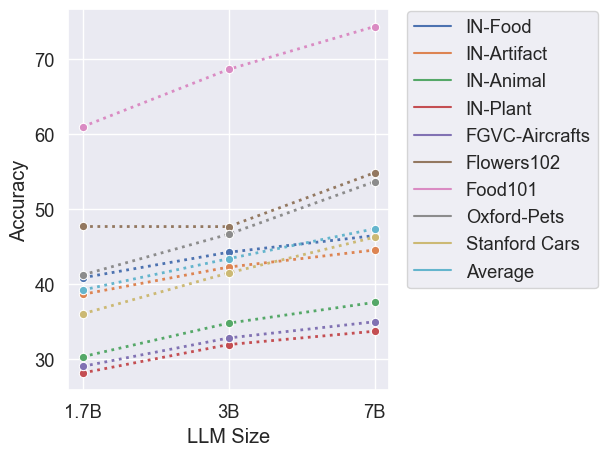

In [41]:
## Experiment as plots
data = []
datasets=['imagenet-6k-food', 'imagenet-6k-artifact', 'imagenet-6k-animal', 'imagenet-6k-plant', 'fgvc_aircraft', 'flowers102', 'food101', 'oxford_pet', 'stanford_cars']
models = ['mtgv_MobileVLM_V2-1.7B', 'mtgv_MobileVLM_V2-3B', 'MobileVLM v2']
print(models)
for model, name in zip(models, ["1.7B", "3B", "7B"]):
    accs = []
    for dataset in datasets:
        acc = all_results_dict[dataset][model]['accuracy']
        data.append(dict(model=name, acc=acc, dataset=ds_names.get(dataset, dataset)))
        accs.append(acc)
    data.append(dict(model=name, acc=np.mean(accs), dataset="Average"))
data = pd.DataFrame.from_dict(data)

sns.set(font_scale=1.2, )
g = sns.lineplot(data=data, x="model", y="acc", hue="dataset", marker="o", linestyle=":", linewidth=2)
g.set_xlabel("LLM Size")
g.set_ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)  # Adjust values as needed
plt.tight_layout()
plt.savefig("llm_size.pdf", dpi=200)
plt.show()

['stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_34_08', 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_336.openai-03_20_2024_07_38_53', 'stabilityai_stablelm-2-zephyr-1_6b###vit_so400m_patch14_siglip_224-03_20_2024_07_44_13']


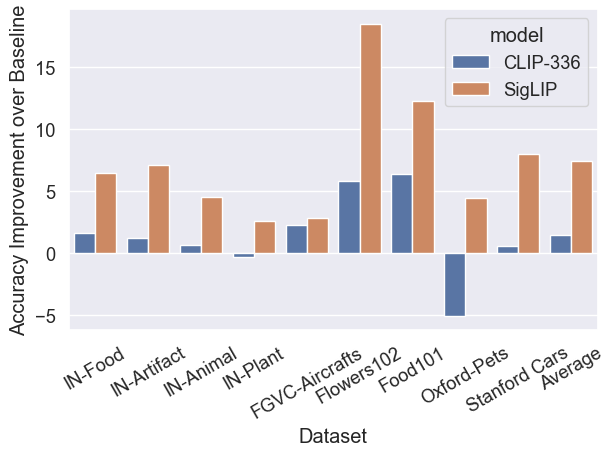

In [31]:
models = ['stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_34_08', 'stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_336.openai-03_20_2024_07_38_53', 'stabilityai_stablelm-2-zephyr-1_6b###vit_so400m_patch14_siglip_224-03_20_2024_07_44_13']
data = []
datasets=['imagenet-6k-food', 'imagenet-6k-artifact', 'imagenet-6k-animal', 'imagenet-6k-plant', 'fgvc_aircraft', 'flowers102', 'food101', 'oxford_pet', 'stanford_cars']
print(models)
for i, name in enumerate(["CLIP-336", "SigLIP"]):
    accs = []
    for dataset in datasets:
        acc = all_results_dict[dataset][models[1+i]]['accuracy'] - all_results_dict[dataset][models[0]]['accuracy']
        data.append(dict(model=name, acc=acc, dataset=ds_names.get(dataset, dataset)))
        accs.append(acc)
    data.append(dict(model=name, acc=np.mean(accs), dataset="Average"))
data = pd.DataFrame.from_dict(data)

sns.set(font_scale=1.2, )
g = sns.barplot(data=data, x="dataset", y="acc", hue="model", errorbar=None)
g.set_xlabel("Dataset")
g.set_ylabel("Accuracy Improvement over Baseline")
plt.xticks(rotation=30)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)  # Adjust values as needed
plt.tight_layout()
plt.savefig("image_encoder.pdf", dpi=200)
plt.show()

## Error Trace CLIP

In [13]:
results_folder = Path("../results_clip")

all_clip_results = defaultdict(list)

for filename in results_folder.iterdir():
    res = json.load(open(filename))
    _, dataset, model = filename.name[:-len(".json")].split("--")
    res_dict = dict(model=model, accuracy=res["metrics"]["acc"]*100, accuracy4=res["metrics"]["acc4"]*100)
    
    if "geode" in dataset:
        per_region_acc = defaultdict(lambda: 0)
        per_region_count = defaultdict(lambda : 0)
        for pred in res["predictions"]:
            region = pred["image"].split("/")[1]
            correct = pred["target"]
            answer = pred["prediction"]
            per_region_count[region] += 1
            per_region_acc[region] += int(correct==answer)
        res_dict["regions"] = list(per_region_acc.keys())
        per_region_acc = [100*per_region_acc[k]/per_region_count[k] for k in per_region_acc.keys()]
        res_dict["per_region"] = per_region_acc
    
    all_clip_results[dataset].append(res_dict)

In [14]:
for dataset, ress in all_clip_results.items():
    print(f"\n### {dataset}")
    for res in sorted(ress, key=lambda x: x["model"]):
        print(f"{res['model']: <35}\t{res['accuracy']:.2f}\t{res['accuracy4']:.2f}")
        if "geode" in dataset:
            print(", ".join(f"{r}={rs:.2f}" for r, rs in zip(res["regions"], res["per_region"])))


### fgvc_aircraft
EVA01-g-14-laion400m_s11b_b41k     	33.99	47.01
ViT-H-14-laion2b_s32b_b79k         	42.12	52.81
ViT-L-14-336-openai                	34.14	49.68
ViT-SO400M-14-SigLIP-webli         	58.51	69.10

### flowers102
EVA01-g-14-laion400m_s11b_b41k     	74.17	75.05
ViT-H-14-laion2b_s32b_b79k         	79.51	80.29
ViT-L-14-336-openai                	78.71	80.81
ViT-SO400M-14-SigLIP-webli         	92.80	93.69

### food101
EVA01-g-14-laion400m_s11b_b41k     	93.16	93.45
ViT-H-14-laion2b_s32b_b79k         	92.80	93.03
ViT-L-14-336-openai                	93.98	94.48
ViT-SO400M-14-SigLIP-webli         	95.24	95.57

### geode
EVA01-g-14-laion400m_s11b_b41k     	91.43	91.72
Europe=93.55, Africa=89.01, SouthEastAsia=91.16, Americas=91.94, WestAsia=92.03, EastAsia=91.21
ViT-H-14-laion2b_s32b_b79k         	91.66	91.92
Europe=93.47, Africa=89.75, SouthEastAsia=90.87, Americas=92.18, WestAsia=93.14, EastAsia=90.95
ViT-L-14-336-openai                	90.31	90.90
Europe=91.61, Africa=88.01, S

In [15]:
for dataset, ress in all_clip_results.items():
    print(f"\n### {dataset}")
    ress_models = all_results[dataset]
    for res in sorted(ress, key=lambda x: x["model"]):
        print(f"{res['model']: <35}\t{res['accuracy']:.2f}")
    for res in sorted(ress_models, key=lambda x: x["model"]):
        print(f"{res['model']: <35}\t{res['accuracy']:.2f}")


### fgvc_aircraft
EVA01-g-14-laion400m_s11b_b41k     	33.99
ViT-H-14-laion2b_s32b_b79k         	42.12
ViT-L-14-336-openai                	34.14
ViT-SO400M-14-SigLIP-webli         	58.51
HuggingFaceM4_idefics-9b-instruct  	34.62
HuggingFaceM4_idefics2-8b          	56.23
Qwen_Qwen-VL-Chat                  	45.96
Salesforce_blip2-flan-t5-xl        	32.94
Salesforce_instructblip-flan-t5-xl 	29.19
Salesforce_instructblip-vicuna-7b  	31.68
adept_fuyu-8b                      	25.17
google_paligemma-3b-mix-224        	39.87
internlm_internlm-xcomposer2-vl-7b 	40.53
llava-hf_llava-1.5-7b-hf           	34.71
llava-hf_llava-v1.6-mistral-7b-hf  	32.49
microsoft_Phi-3-vision-128k-instruct	42.33
mtgv_MobileVLM_V2-1.7B             	29.07
mtgv_MobileVLM_V2-3B               	32.85
mtgv_MobileVLM_V2-7B               	35.01
stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_34_08	30.27
stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_

In [16]:
def model2clip(model):
    if "blip" in model:
        return "EVA01-g-14-laion400m_s11b_b41k"
    elif "idefics" in model and not "idefics2" in model:
        return "ViT-H-14-laion2b_s32b_b79k"
    elif "llava" in model or "Mobile" in model:
        return "ViT-L-14-336-openai"
    else:
        raise ValueError(f"Not supported: {model}")
    
    
results_folder = Path("../results/mc")

error_tracing = defaultdict(list)

for filename in results_folder.iterdir():
    if "babel" in filename.name:
        continue
    if "yn--" in filename.name:
        continue
    dataset, model = filename.name[:-len(".json")].split("--")
    name = names.get(model, model)
    try:
        clip_model = model2clip(model)
    except ValueError as e:
        # print(e)
        continue
    res = json.load(open(filename))
    
    clip_res = json.load(open(f"../results_clip/clip--{dataset}--{clip_model}.json"))
    
    combination_occurence = defaultdict(lambda : 0)
    geode_occurence = defaultdict(lambda : defaultdict(lambda : 0))
    for pred, clip_pred in zip(res["predictions"], clip_res["predictions"]):
        assert pred["image"] == clip_pred["image"], pred["image"]
        clip_correct4 = clip_pred["prediction4"] == clip_pred["target"]
        model_correct = pred["predicted"] == pred["correct"]
        combination_occurence[(clip_correct4, model_correct)] += 1
        
        if "geode" in dataset:
            region = pred["image"].split("/")[1]
            geode_occurence[region][(clip_correct4, model_correct)] += 1
        
    total = sum(combination_occurence.values())
    total_clip_right = combination_occurence[(True, True)] + combination_occurence[(True, False)]
    total_clip_wrong = combination_occurence[(False, True)] + combination_occurence[(False, False)]
    res_dict = dict(model=model, name=name, clip=clip_model, accuracy_clip=clip_res["metrics"]["acc"]*100, accuracy_clip4=clip_res["metrics"]["acc4"]*100, accuracy=res["metrics"]["accuracy"]*100,
                    clip_right_model_right=combination_occurence[(True, True)]/total_clip_right,
                    clip_wrong_model_right=combination_occurence[(False, True)]/total_clip_wrong,
                    clip_right_model_wrong=combination_occurence[(True, False)]/total_clip_right,
                    clip_wrong_model_wrong=combination_occurence[(False, False)]/total_clip_wrong,
                    )
    if "geode" in dataset:
        total_clip_right_region = {region: geode_occurence[region][(True, True)] + geode_occurence[region][(True, False)] for region in geode_occurence}
        total_clip_wrong_region = {region: geode_occurence[region][(False, True)] + geode_occurence[region][(False, False)] for region in geode_occurence}
        for region in geode_occurence:
            res_dict.update({
                region+"_clip_right_model_right":geode_occurence[region][(True, True)]/total_clip_right_region[region],
                region+"_clip_wrong_model_right":geode_occurence[region][(False, True)]/total_clip_wrong_region[region],
                region+"_clip_right_model_wrong":geode_occurence[region][(True, False)]/total_clip_right_region[region],
                region+"_clip_wrong_model_wrong":geode_occurence[region][(False, False)]/total_clip_wrong_region[region],
            })
    
    error_tracing[dataset].append(res_dict)
    
        
        
    

In [17]:
for dataset, ress in error_tracing.items():
    print(f"\n### {dataset}")
    for res in sorted(ress, key=lambda x: x["model"]):
        print(f"{res['model']+' '+res['clip']: <70}\t{res['clip_right_model_right']:.2f}\t{res['clip_right_model_wrong']:.2f}\t\t{res['clip_wrong_model_right']:.2f}\t{res['clip_wrong_model_wrong']:.2f}")
        #\t{res['accuracy']:.2f}\t{res['accuracy4']:.2f}\t


### fgvc_aircraft
HuggingFaceM4_idefics-9b-instruct ViT-H-14-laion2b_s32b_b79k          	0.40	0.60		0.29	0.71
Salesforce_blip2-flan-t5-xl EVA01-g-14-laion400m_s11b_b41k            	0.38	0.62		0.28	0.72
Salesforce_instructblip-flan-t5-xl EVA01-g-14-laion400m_s11b_b41k     	0.33	0.67		0.26	0.74
Salesforce_instructblip-vicuna-7b EVA01-g-14-laion400m_s11b_b41k      	0.37	0.63		0.27	0.73
llava-hf_llava-1.5-7b-hf ViT-L-14-336-openai                          	0.44	0.56		0.25	0.75
llava-hf_llava-v1.6-mistral-7b-hf ViT-L-14-336-openai                 	0.39	0.61		0.26	0.74
mtgv_MobileVLM_V2-1.7B ViT-L-14-336-openai                            	0.34	0.66		0.24	0.76
mtgv_MobileVLM_V2-3B ViT-L-14-336-openai                              	0.40	0.60		0.26	0.74
mtgv_MobileVLM_V2-7B ViT-L-14-336-openai                              	0.40	0.60		0.30	0.70

### flowers102
HuggingFaceM4_idefics-9b-instruct ViT-H-14-laion2b_s32b_b79k          	0.60	0.40		0.20	0.80
Salesforce_blip2-flan-t5-xl EVA01-g-14-laion4

In [18]:
for res in sorted(error_tracing["geode"], key=lambda x: x["model"]):
    print(f"{res['model']+' '+res['clip']: <70}")
    for region in ["Europe", "Africa", "SouthEastAsia", "Americas", "WestAsia", "EastAsia"]:
        print(f"{region: <20}\t{res[f'{region}_clip_right_model_right']:.2f}\t{res[f'{region}_clip_right_model_wrong']:.2f}\t\t{res[f'{region}_clip_wrong_model_right']:.2f}\t{res[f'{region}_clip_wrong_model_wrong']:.2f}")

HuggingFaceM4_idefics-9b-instruct ViT-H-14-laion2b_s32b_b79k          
Europe              	0.88	0.12		0.54	0.46
Africa              	0.83	0.17		0.49	0.51
SouthEastAsia       	0.87	0.13		0.57	0.43
Americas            	0.86	0.14		0.53	0.47
WestAsia            	0.86	0.14		0.50	0.50
EastAsia            	0.87	0.13		0.51	0.49
Salesforce_blip2-flan-t5-xl EVA01-g-14-laion400m_s11b_b41k            
Europe              	0.93	0.07		0.65	0.35
Africa              	0.91	0.09		0.61	0.39
SouthEastAsia       	0.94	0.06		0.63	0.37
Americas            	0.92	0.08		0.61	0.39
WestAsia            	0.93	0.07		0.65	0.35
EastAsia            	0.92	0.08		0.56	0.44
Salesforce_instructblip-flan-t5-xl EVA01-g-14-laion400m_s11b_b41k     
Europe              	0.90	0.10		0.62	0.38
Africa              	0.87	0.13		0.62	0.38
SouthEastAsia       	0.91	0.09		0.61	0.39
Americas            	0.89	0.11		0.58	0.42
WestAsia            	0.90	0.10		0.64	0.36
EastAsia            	0.91	0.09		0.54	0.46
Salesforce_instructblip-vicuna-

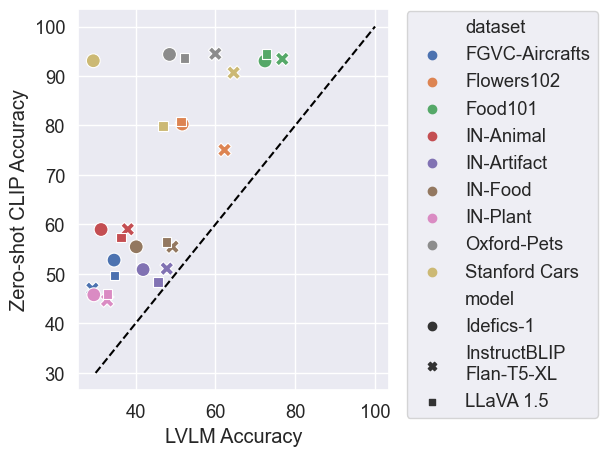

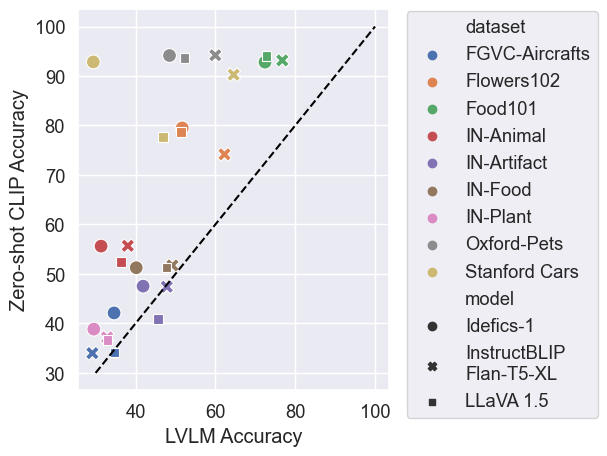

In [29]:
plot_data = []
for dataset, ress in error_tracing.items():
    if "imagenet" in dataset and not "6k" in dataset:
        continue
    if "geode" in dataset:
        continue
    for res in sorted(ress, key=lambda x: x["model"]):
        if any(f in res["model"] for f in ["Mobile", "stability", "blip2", "vicuna", "1.6"]):
            continue
        name = res["name"]
        if name == "InstructBLIP Flan-T5-XL":
            name = "InstructBLIP\nFlan-T5-XL"
        plot_data.append({
            "model": name,
            "clip": res["accuracy_clip"],
            "clip4": res["accuracy_clip4"],
            "lvlm": res["accuracy"],
            "dataset": ds_names.get(dataset, dataset)
        })
plot_data = pd.DataFrame.from_dict(plot_data)
sns.set(font_scale=1.2, )
g = sns.scatterplot(data=plot_data, x="lvlm", y="clip4", hue="dataset", style="model", s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)  # Adjust values as needed
g.plot([30, 100], [30, 100], linestyle='--', color='black')  # You can customize color
g.set_ylabel("Zero-shot CLIP Accuracy")
g.set_xlabel("LVLM Accuracy")
# g.set_ylim(30, 100)
# g.set_xlim(30, 100)
plt.tight_layout()
plt.savefig("clip_lvlm_scatter.pdf", dpi=200)
plt.show()

sns.set(font_scale=1.2, )
g = sns.scatterplot(data=plot_data, x="lvlm", y="clip", hue="dataset", style="model", s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)  # Adjust values as needed
g.plot([30, 100], [30, 100], linestyle='--', color='black')  # You can customize color
g.set_ylabel("Zero-shot CLIP Accuracy")
g.set_xlabel("LVLM Accuracy")
# g.set_ylim(30, 100)
# g.set_xlim(30, 100)
plt.tight_layout()
plt.savefig("clip_full-zs_lvlm_scatter.pdf", dpi=200)
plt.show()

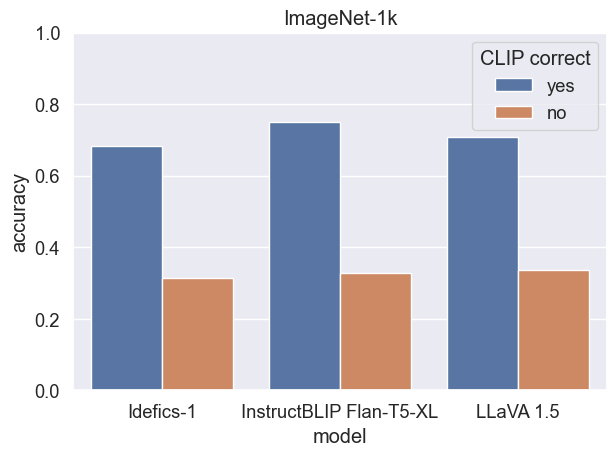

In [20]:

plot_data = []
for res in sorted(error_tracing["imagenet"], key=lambda x: x["model"]):
    if any(f in res["model"] for f in ["Mobile", "stability", "blip2", "vicuna", "1.6"]):
        continue
    plot_data.append({
        "model": res["name"],
        "CLIP correct": "yes",
        "accuracy": res["clip_right_model_right"],
    })
    plot_data.append({
        "model": res["name"],
        "CLIP correct": "no",
        "accuracy": res["clip_wrong_model_right"],
    })
plot_data = pd.DataFrame.from_dict(plot_data)
sns.set(font_scale=1.2, )
g = sns.barplot(data=plot_data, x="model", y="accuracy", hue="CLIP correct",)
g.set_title("ImageNet-1k")
g.set_ylim([0, 1])
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)  # Adjust values as needed
plt.tight_layout()
plt.savefig("imagenet_clip_error_trace.pdf", dpi=200)
plt.show()

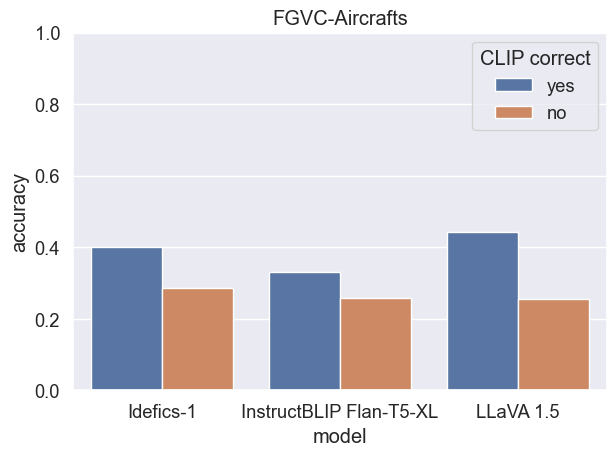

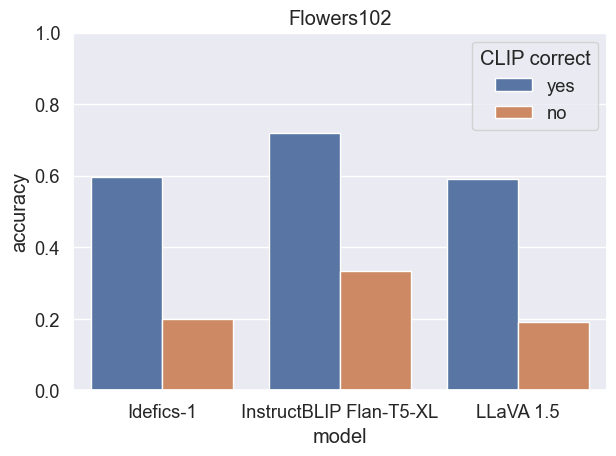

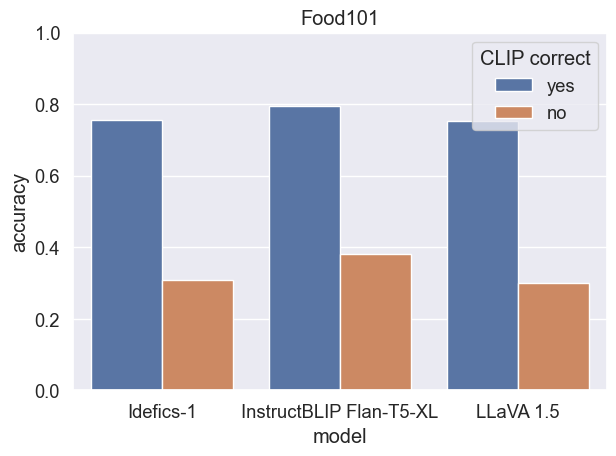

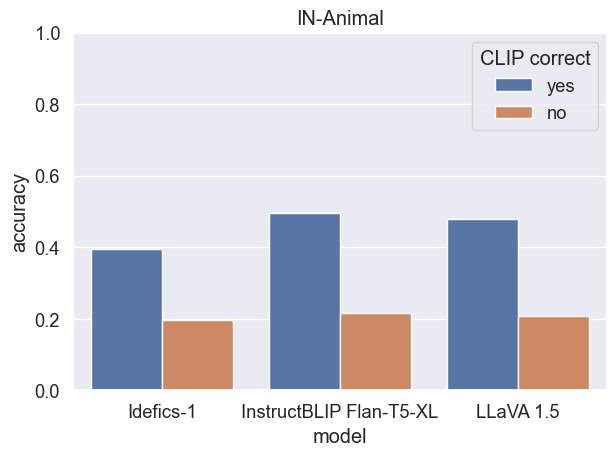

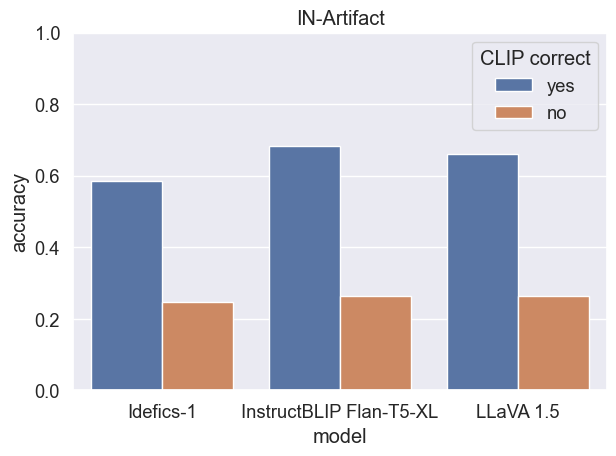

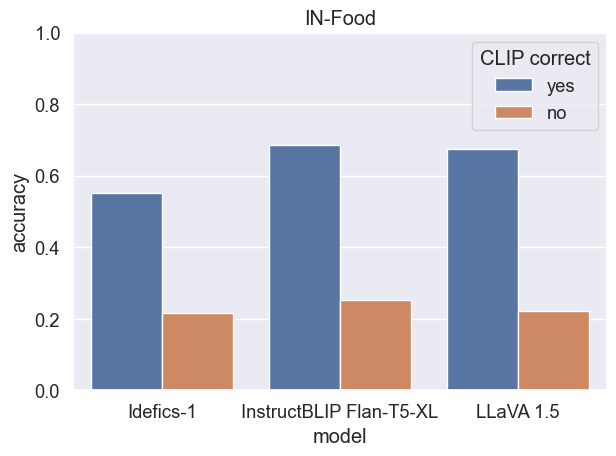

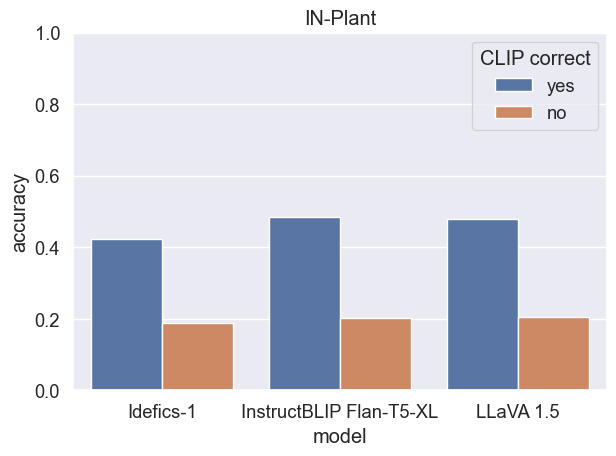

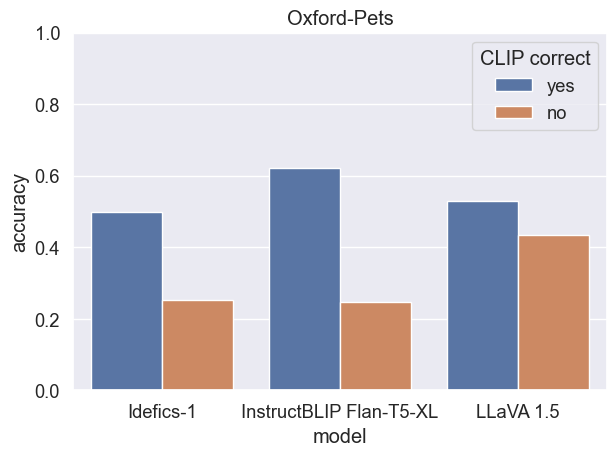

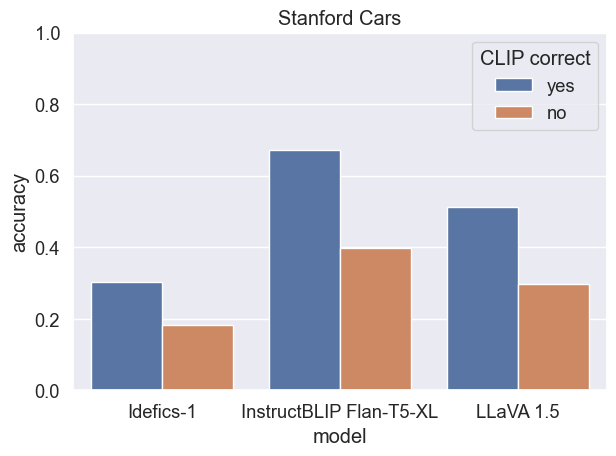

In [21]:
for ds in error_tracing.keys():
    if "imagenet" in ds and not "6k" in ds:
        continue
    if "geode" in ds:
        continue
    plot_data = []
    for res in sorted(error_tracing[ds], key=lambda x: x["model"]):
        if any(f in res["model"] for f in ["Mobile", "stability", "blip2", "vicuna", "1.6"]):
            continue
        plot_data.append({
            "model": res["name"],
            "CLIP correct": "yes",
            "accuracy": res["clip_right_model_right"],
        })
        plot_data.append({
            "model": res["name"],
            "CLIP correct": "no",
            "accuracy": res["clip_wrong_model_right"],
        })
    plot_data = pd.DataFrame.from_dict(plot_data)
    sns.set(font_scale=1.2, )
    g = sns.barplot(data=plot_data, x="model", y="accuracy", hue="CLIP correct",)
    g.set_title(ds_names.get(ds, ds))
    g.set_ylim([0, 1])
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)  # Adjust values as needed
    plt.savefig(f"{ds}_clip_error_trace.pdf", dpi=200)
    plt.tight_layout()
    plt.show()

## Training improvements per class

[('black-eyed susan', -52.94117647058823), ('balloon flower', -48.275862068965516), ('bird of paradise', -40.0), ('red ginger', -36.36363636363637), ('osteospermum', -34.146341463414636), ('corn poppy', -28.57142857142857), ('columbine', -22.72727272727272), ('cyclamen', -20.8955223880597), ('globe flower', -19.047619047619047), ('siam tulip', -19.047619047619047), ('water lily', -15.517241379310349), ('orange dahlia', -12.765957446808514), ('yellow iris', -10.34482758620689), ('canterbury bells', -10.0), ('windflower', -8.823529411764707), ('morning glory', -8.045977011494244), ('garden phlox', -8.0), ('cape flower', -7.954545454545454), ('trumpet creeper', -7.894736842105262), ('pincushion flower', -7.692307692307693), ('silverbush', -6.25), ('watercress', -5.487804878048781), ('pink primrose', -5.0), ('moon orchid', -5.0), ('prince of wales feathers', -5.0), ('pelargonium', -3.9215686274509802), ('globe thistle', 0.0), ('spear thistle', 0.0), ('daffodil', 0.0), ('poinsettia', 0.0), 

<Axes: >

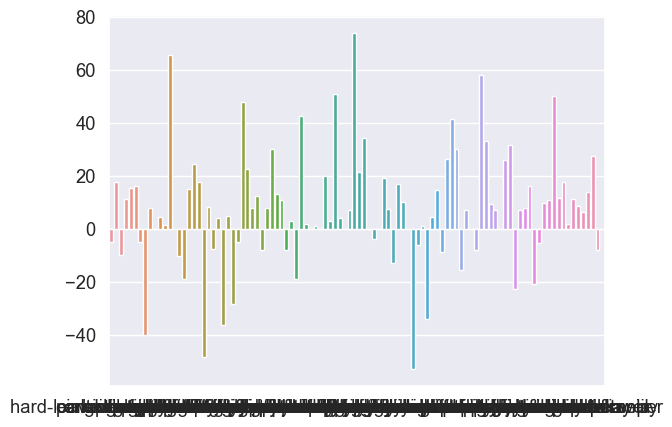

In [22]:
#stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_34_08	base
# stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_35_45	train
# stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_20_2024_07_38_40	30.09
# stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_20_2024_07_38_45	32.16

base_flowers = all_results_dict["flowers102"]["stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_34_08"]
train_flowers = all_results_dict["flowers102"]["stabilityai_stablelm-2-zephyr-1_6b###vit_large_patch14_clip_224.openai-03_19_2024_15_35_45"]
delta = [t-b for t,b in zip(train_flowers["per_class"], base_flowers["per_class"])]
class_delta = sorted(zip(train_flowers["classes"], delta), key=lambda x: x[1])
print(class_delta)
sns.barplot(y=delta, x=train_flowers["classes"])
### NO, the flowers with big improvement are not really in ImageNet so this is not the cause.

## Compare Delimiter


In [23]:
results_folder = "../results/mc"
results_old_folder = "../results/mc_space-options"
results_delimiter = defaultdict(list)
for filename in os.listdir(results_folder):
    try:
        res = json.load(open(os.path.join(results_folder, filename)))
        res_old = json.load(open(os.path.join(results_old_folder, filename)))
    except:
        continue
    dataset, model = filename.split(".")[0].split("--")
    
    res_dict = dict(model=model, 
                    accuracy=res["metrics"]["accuracy"]*100 - res_old["metrics"]["accuracy"]*100,
                    failures=res["metrics"]["generation_failures"]*100 - res_old["metrics"]["generation_failures"]*100)
    results_delimiter[dataset].append(res_dict)

In [24]:
for dataset, ress in results_delimiter.items():
    print(f"\n### {dataset}")
    for res in sorted(ress, key=lambda x: x["model"]):
        print(f"{res['model']: <35}\t{res['accuracy']:.2f}\t{res['failures']:.2f}")


### fgvc_aircraft
HuggingFaceM4_idefics-9b-instruct  	10.08	-0.33
Qwen_Qwen-VL-Chat                  	1.44	-0.03
Salesforce_blip2-flan-t5-xl        	1.11	0.00
Salesforce_instructblip-flan-t5-xl 	-0.96	0.00
Salesforce_instructblip-vicuna-7b  	6.54	0.00
llava-hf_llava-1                   	3.21	0.00

### flowers102
HuggingFaceM4_idefics-9b-instruct  	12.15	-5.03
Qwen_Qwen-VL-Chat                  	0.41	0.00
Salesforce_blip2-flan-t5-xl        	-0.34	0.00
Salesforce_instructblip-flan-t5-xl 	0.18	-0.05
Salesforce_instructblip-vicuna-7b  	18.00	5.46
llava-hf_llava-1                   	6.73	0.00

### food101
HuggingFaceM4_idefics-9b-instruct  	23.55	-0.01
Qwen_Qwen-VL-Chat                  	-0.89	-0.06
Salesforce_blip2-flan-t5-xl        	0.02	0.00
Salesforce_instructblip-flan-t5-xl 	0.12	-0.04
Salesforce_instructblip-vicuna-7b  	32.55	1.09
llava-hf_llava-1                   	17.85	0.00

### geode
HuggingFaceM4_idefics-9b-instruct  	29.10	0.02
Qwen_Qwen-VL-Chat                  	0.89	-0.29
Sal

# Decision

In [25]:

results_folder = Path("../results/yn")

all_results_yn = defaultdict(list)

for filename in results_folder.iterdir():
    if "yn--" not in filename.name:
        continue
    res = json.load(open(filename))
    _, dataset, model = filename.name.split(".")[0].split("--")
    
    res_dict = dict(model=model, accuracy=res["metrics"]["accuracy"]*100, failures=res["metrics"]["generation_failures"]*100)
    
    per_class_acc = dict(yes=0, no=0)
    per_class_count = dict(yes=0, no=0)
    per_class_predict = dict(yes=0, no=0)
    
    TP, TN, FP, FN = 0, 0, 0, 0
    
    for pred in res["predictions"]:
        correct = pred["correct"]
        answer = pred["predicted"]
        if answer.lower().startswith("yes"):
            per_class_predict["yes"] += 1
        elif answer.lower().startswith("no"):
            per_class_predict["no"] += 1
        per_class_count[correct] += 1
        per_class_acc[correct] += int(answer.lower().startswith(correct.lower()))
        if answer.lower().startswith("yes") and correct == "yes":
            TP += 1
        elif answer.lower().startswith("yes") and correct == "no":
            FP += 1
        elif answer.lower().startswith("no") and correct == "no":
            TN += 1
        elif answer.lower().startswith("no") and correct == "yes":
            FN += 1
            
    precision = float(TP) / float(TP + FP)
    recall = float(TP) / float(TP + FN)
    f1 = 2*precision*recall / (precision + recall)
    acc = (TP + TN) / (TP + TN + FP + FN)
    res_dict["precision"] = precision * 100
    res_dict["recall"] = recall * 100
    res_dict["f1"] = f1 * 100
    # print(acc * 100 - res_dict["accuracy"])
    res_dict["classes"] = list(per_class_count.keys())
    per_class_acc = [100*per_class_acc[k]/per_class_count[k] for k in per_class_acc.keys()]
    res_dict["per_class"] = per_class_acc
    res_dict["per_class_predict"] = [100*per_class_predict[k]/sum(per_class_predict.values()) for k in per_class_predict.keys()]
    
    all_results_yn[dataset].append(res_dict)
# all_results["geode"]


In [26]:
for dataset, ress in all_results_yn.items():
    print(f"### {dataset}")
    for res in sorted(ress, key=lambda x: x["model"]):
        print(f"{res['model']: <35}\t{res['accuracy']:.2f}\t{res['f1']:.2f}\t{res['precision']:.2f}\t{res['recall']:.2f}\t{res['failures']:.2f}\t{list(map(int, res['per_class_predict']))}")
        # print(f"{list(map(int, res['per_class_predict']))} {res['classes']}")

### fgvc_aircraft
HuggingFaceM4_idefics-9b-instruct  	53.62	54.26	53.22	55.34	0.00	[51, 48]
Qwen_Qwen-VL-Chat                  	59.83	70.24	56.77	92.07	0.00	[83, 16]
Salesforce_blip2-flan-t5-xl        	52.18	45.60	51.42	40.96	0.00	[38, 61]
Salesforce_instructblip-flan-t5-xl 	49.80	43.84	52.75	37.51	0.00	[37, 62]
Salesforce_instructblip-vicuna-7b  	51.64	58.13	50.70	68.11	0.00	[66, 33]
llava-hf_llava-1                   	52.75	42.07	55.48	33.89	0.00	[30, 69]
### flowers102
HuggingFaceM4_idefics-9b-instruct  	60.48	66.94	57.88	79.35	0.00	[69, 30]
Qwen_Qwen-VL-Chat                  	61.75	70.59	57.19	92.16	0.00	[80, 19]
Salesforce_blip2-flan-t5-xl        	67.57	70.64	65.44	76.74	0.00	[59, 40]
Salesforce_instructblip-flan-t5-xl 	66.14	65.35	67.62	63.22	0.00	[47, 52]
Salesforce_instructblip-vicuna-7b  	67.83	67.89	68.16	67.63	0.00	[49, 50]
llava-hf_llava-1                   	52.32	61.60	51.75	76.09	0.00	[73, 26]
### food101
HuggingFaceM4_idefics-9b-instruct  	71.79	74.89	67.66	83.85	0.00	[6